In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
housing_full = pd.read_csv('data/Housing_data.csv')

In [4]:
housing_full.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Applying Preprocessing to the data to make it zero mean, unit variance

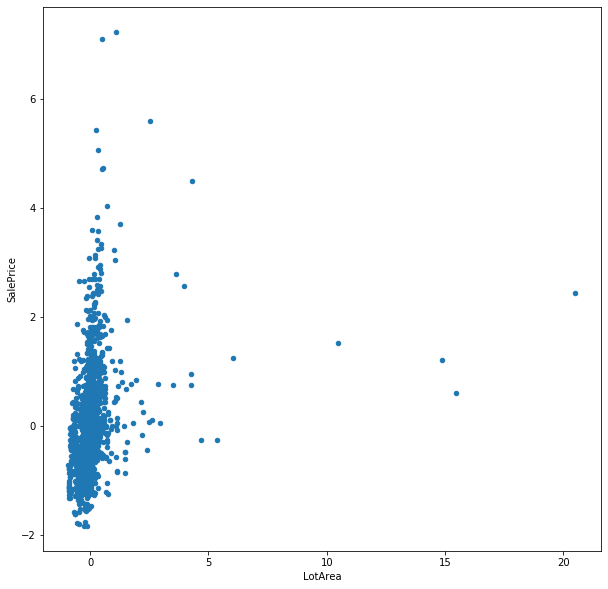

In [39]:
from sklearn.preprocessing import StandardScaler

df = housing_full[['LotArea', 'SalePrice']]
df = df.dropna()

cols = list(df.columns)

for column in cols:
    df[column] = StandardScaler().fit_transform(df[[column]])

df.plot.scatter(x=cols[0], y=cols[1], figsize=(10,10))

 ### 2. Calculated the LOF score for each point  
      Assuming points having an LOF score greater than 1.5 to be outliers and mapping them in orange color

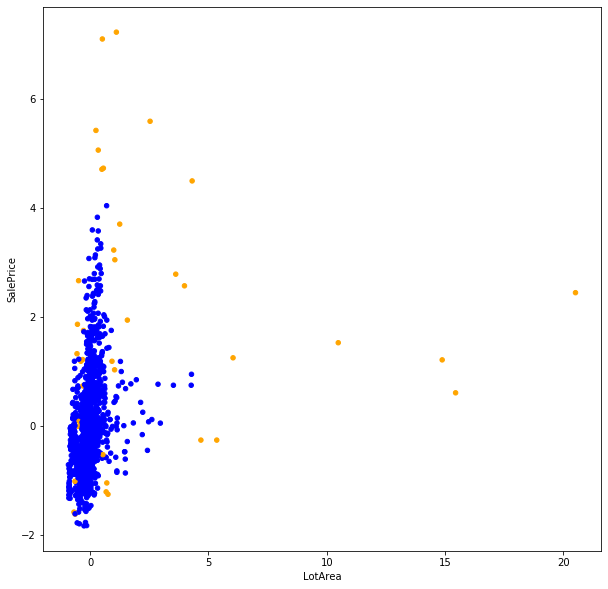

In [40]:
from sklearn.neighbors import LocalOutlierFactor

loc = LocalOutlierFactor(n_neighbors=10)
loc.fit(df)

df['LOF Score'] = loc.negative_outlier_factor_*(-1)
df['Outlier'] = loc.fit_predict(df)

df['color'] = df['LOF Score'].map(lambda x: 'orange' if x>=1.5 else 'blue')
ax1 = df.plot.scatter(x=cols[0], y=cols[1], c=df['color'],figsize=(10,10))

### Calculate Density around each point using KDE

In [63]:
from sklearn.neighbors import LocalOutlierFactor, KernelDensity, NearestNeighbors

kde = KernelDensity(bandwidth=4)
kde.fit(df[cols])
df['kde'] = kde.score_samples(df[cols])

### Construct a grid of points on the scatterplot to estimate the KDE and then calculate the gradients

In [64]:
x = np.arange(0,30,0.1)
y = np.arange(0,30,0.1)

xx, yy = np.meshgrid(x, y)

In [65]:
def get_density(x, y, kde):
    
    return -1/kde.score_samples(np.array([x, y]).reshape(1,-1))[0]

In [66]:
vec_dens = np.vectorize(get_density)

In [67]:
z = vec_dens(xx, yy, kde)

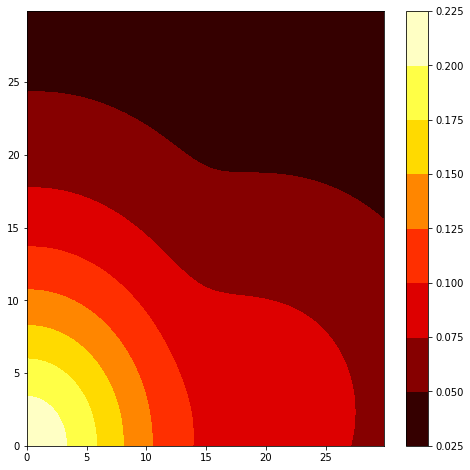

In [68]:
fig = plt.figure(figsize=(8,8))
plt.contourf(x,y,z, cmap='hot')
plt.colorbar()

In [49]:
# # Transform metric values (LOF, Density)

# # Calculate density peaks
# # Currently set them to top 10% highest kde density points

# threshold = np.percentile(df['kde'], 90)

# # Calculate all points with density field greater than this value

# peaks = df[df['kde']>=threshold]
# df['color'] = df.apply(lambda x: 'yellow' if x['kde']>=threshold else x['color'], axis=1)
# peaks = peaks[cols].to_numpy()

# df.plot.scatter(x=cols[0], y=cols[1], c=df['color'],figsize=(10,10),
#                 title="Scatterplot with density peaks highlighted in yellow")

# # Train a nearest neighbors model to assign datapoints their nearest density peak 
# # peaks_nn = NearestNeighbors(n_neighbors=1)
# peaks_nn.fit(peaks)

array([[  -2.31452706,   -2.34267268,   -2.38003533, ..., -226.86668343,
        -228.95651964, -231.05635585],
       [  -2.32865925,   -2.35667715,   -2.39390135, ..., -226.96284411,
        -229.05268032, -231.15251653],
       [  -2.34698068,   -2.37488732,   -2.41199179, ..., -227.0690048 ,
        -229.15884101, -231.25867722],
       ...,
       [-176.50546699, -176.53933227, -176.58319756, ..., -626.12345608,
        -629.12732136, -632.14118664],
       [-178.3398917 , -178.37375698, -178.41762226, ..., -627.95788078,
        -630.96174607, -633.97561135],
       [-180.18431641, -180.21818169, -180.26204697, ..., -629.80230549,
        -632.80617077, -635.82003606]])